## TASK 1: Decision Tree: Google Play Store

In [1]:
# Load necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Dataset
GPS_df = pd.read_csv(r"/Users/payalchavan/Documents/Data Mining_Assignments/Assignment 4/Google PlayStore Dataset.csv")
GPS_df.head()

,App_Title,Rating,User_Rating,Update,Size,Installs,Version,Required Android,Category
0,Adobe Spark Post: Graphic design made easy,4.4,29763,3/20/2020,61000000,5000000,3.8.6,5.0 and up,Art & Design
1,ArtRabbit - Your guide to art exhibitions & ev...,3.8,53,2/11/2020,17000000,10000,1.4.5,5.0 and up,Art & Design
2,Menu AR Augmented Reality Food,4.5,84,11/29/2019,8200000,5000,2.78,5.0 and up,Food & Drink
3,WOORLD,4.2,21,12/8/2016,83000000,5000,1.2.0,4.2 and up,Casual
4,Temple Treasure Hunt Game,3.3,344,2/24/2014,26000000,10000,1.4,3.0 and up,Health & Fitness


### 1. Data Preprocessing

In [3]:
GPS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App_Title         3509 non-null   object 
 1   Rating            3509 non-null   float64
 2   User_Rating       3509 non-null   int64  
 3   Update            3509 non-null   object 
 4   Size              3509 non-null   int64  
 5   Installs          3509 non-null   int64  
 6   Version           3509 non-null   object 
 7   Required Android  3509 non-null   object 
 8   Category          3509 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 246.9+ KB


In [4]:
# Take a look at the data structure
GPS_df.shape

(3509, 9)

In [5]:
# Checking for missing values in the dataset
GPS_df.isnull().sum()

App_Title           0
Rating              0
User_Rating         0
Update              0
Size                0
Installs            0
Version             0
Required Android    0
Category            0
dtype: int64

In [6]:
# Checking summary statistics
GPS_df.describe()

,Rating,User_Rating,Size,Installs
count,3509.000000,3.509000e+03,3.509000e+03,3.509000e+03
mean,4.217897,2.382157e+05,2.739918e+07,1.314941e+07
std,0.466524,1.932319e+06,2.947888e+07,1.348113e+08
min,1.500000,5.000000e+00,8.000000e+04,1.000000e+01
25%,4.000000,7.970000e+02,5.400000e+06,1.000000e+05
50%,4.300000,7.400000e+03,1.700000e+07,5.000000e+05
75%,4.500000,6.225800e+04,4.000000e+07,5.000000e+06
max,5.000000,9.655182e+07,5.230000e+08,5.000000e+09


In [7]:
# Checking for duplicate records in the dataset
GPS_df.duplicated().any()

False

In [8]:
# Checking for outliers using the Z-score method
from scipy import stats
z_scores = stats.zscore(GPS_df.select_dtypes(include=[np.number]))

In [9]:
# The threshold for an outlier is usually a Z-score of 3 or -3, i.e., data points that are 3 standard deviations away from the mean
GPS_df = GPS_df[(z_scores < 3).all(axis=1)]

In [10]:
# Checking the no. of records after removing the outliers
GPS_df.shape

(3440, 9)

In [11]:
# Checking data types
GPS_df.dtypes

App_Title            object
Rating              float64
User_Rating           int64
Update               object
Size                  int64
Installs              int64
Version              object
Required Android     object
Category             object
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
# Perform label encoding on the 'Category' column
GPS_df['Category'] = label_encoder.fit_transform(GPS_df['Category'])

GPS_df.head()

,App_Title,Rating,User_Rating,Update,Size,Installs,Version,Required Android,Category
0,Adobe Spark Post: Graphic design made easy,4.4,29763,3/20/2020,61000000,5000000,3.8.6,5.0 and up,3
1,ArtRabbit - Your guide to art exhibitions & ev...,3.8,53,2/11/2020,17000000,10000,1.4.5,5.0 and up,3
2,Menu AR Augmented Reality Food,4.5,84,11/29/2019,8200000,5000,2.78,5.0 and up,20
3,WOORLD,4.2,21,12/8/2016,83000000,5000,1.2.0,4.2 and up,11
4,Temple Treasure Hunt Game,3.3,344,2/24/2014,26000000,10000,1.4,3.0 and up,21


In [13]:
from sklearn.preprocessing import LabelEncoder


# Binning the 'Rating' column into categories
bins = [0, 2, 3.5, 5]
labels = ['Low', 'Medium', 'High']
GPS_df['Rating_Category'] = pd.cut(GPS_df['Rating'], bins=bins, labels=labels, include_lowest=True)

# Perform label encoding on the binned 'Rating' column
GPS_df['Rating_Label'] = LabelEncoder().fit_transform(GPS_df['Rating_Category'])


# Display the unique values of the original, binned, and encoded 'Rating' column
GPS_df[['Rating', 'Rating_Category', 'Rating_Label']].drop_duplicates().sort_values(by='Rating')

,Rating,Rating_Category,Rating_Label
1243,1.5,Low,1
1071,1.7,Low,1
257,1.9,Low,1
1771,2.0,Low,1
1456,2.1,Medium,2
25,2.2,Medium,2
196,2.3,Medium,2
594,2.4,Medium,2
128,2.5,Medium,2
116,2.6,Medium,2


As the target variable 'Rating' is continuous, which means it's not suitable for a Decision Tree classifier in its current form. Decision Tree classifiers are typically used for classification tasks where the target variable is categorical. However, our target variable, presumably the app rating, is continuous. So this problem is dealt by the method called "Binning", which bins the 'Rating' column into categories based on specified bins and labels, then performs label encoding on the binned column, and finally displays the unique values of the original and transformed columns for comparison.

Here's a summary of the transformation:
1. Low: Ratings from 1.5 to 2.0 are labeled as 'Low' and encoded as 1.
2. Medium: Ratings from 2.1 to 3.5 are labeled as 'Medium' and encoded as 2.
3. High: Ratings from 3.6 to 5.0 are labeled as 'High' and encoded as 0.


This transformation allows us to use these discretized ratings as a target variable for classification models, facilitating the modeling of app ratings based on other features in the dataset.

In [14]:
# Check unique ratings
GPS_df.Rating_Label.unique()

array([0, 2, 1])

In [15]:
# Perform feature engineering 

#from datetime import datetime

#GPS_df['Update'] = pd.to_datetime(GPS_df['Update'])

#current_date = datetime.now()

# Calculate app age in years
# Using 'Update' as the column with the last update date
#GPS_df['App Age'] = (current_date - GPS_df['Update']).dt.days / 365

# Calculate popularity ratio
# Assuming 'User_Rating' is the total number of user ratings and 'Installs' is the number of installs
#GPS_df['Popularity Ratio'] = GPS_df['User_Rating'] / GPS_df['Installs'].replace(0, np.nan)  # Replace 0 installs with NaN to avoid division by zero

#GPS_df.head()

### 2. Exploratory Data Analysis

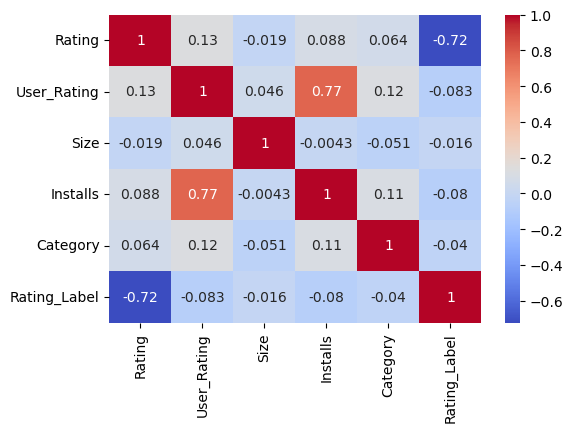

In [16]:
#Correlation matrix
#Exclude non-numerical columns from the correlation matrix calculation

numeric_columns = GPS_df.select_dtypes(include=[np.number]).columns
corr_matrix = GPS_df[numeric_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

From the above correlation matrix, we can observe that the features- 'User_Rating', 'Installs', 'Categorty' are positively correlated with the feature 'Rating'. With that, 'Installs' and 'Rating' tend to have high correlation between them. Hence, these features would make a good choice for feature selection. Also, it may help us to achieve a better accuracy in our decision tree model.

### 3. Feature Selection

In [17]:
# split dataset in features and target variable

feature_cols = ['User_Rating', 'Size', 'Installs', 'Category']
X = GPS_df[feature_cols] # Features
y = GPS_df.Rating_Label # Target variable

The dataset includes both category (App_Title, Update, Version, Required Android, Category) and numerical (Rating, User_Rating, Size, Installs) data types. We will concentrate on features that are likely to affect app ratings for our Decision Tree model.

Relevant features for predicting app ratings could include:

* User_Rating (numerical)
* Size (numerical)
* Installs (numerical)
* Category (categorical)

App_Title, Update, Version, and Required Android will not be included in our feature set since they are either overly particular (App_Title, Version) or don't clearly relate to the rating (Update, Required Android).

### 4. Splitting Data

In [18]:
# Split dataset into training set and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test|

### 5. Building Decision Tree Model

In [19]:
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_clf = dt_clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = dt_clf.predict(X_test)

### 6. Evaluating Model

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8468992248062015


The classification rate of 85% is regarded as satisfactory accuracy. By adjusting the Decision Tree Algorithm's parameters, we can increase its accuracy.

### 7. Visualizing Decision Trees

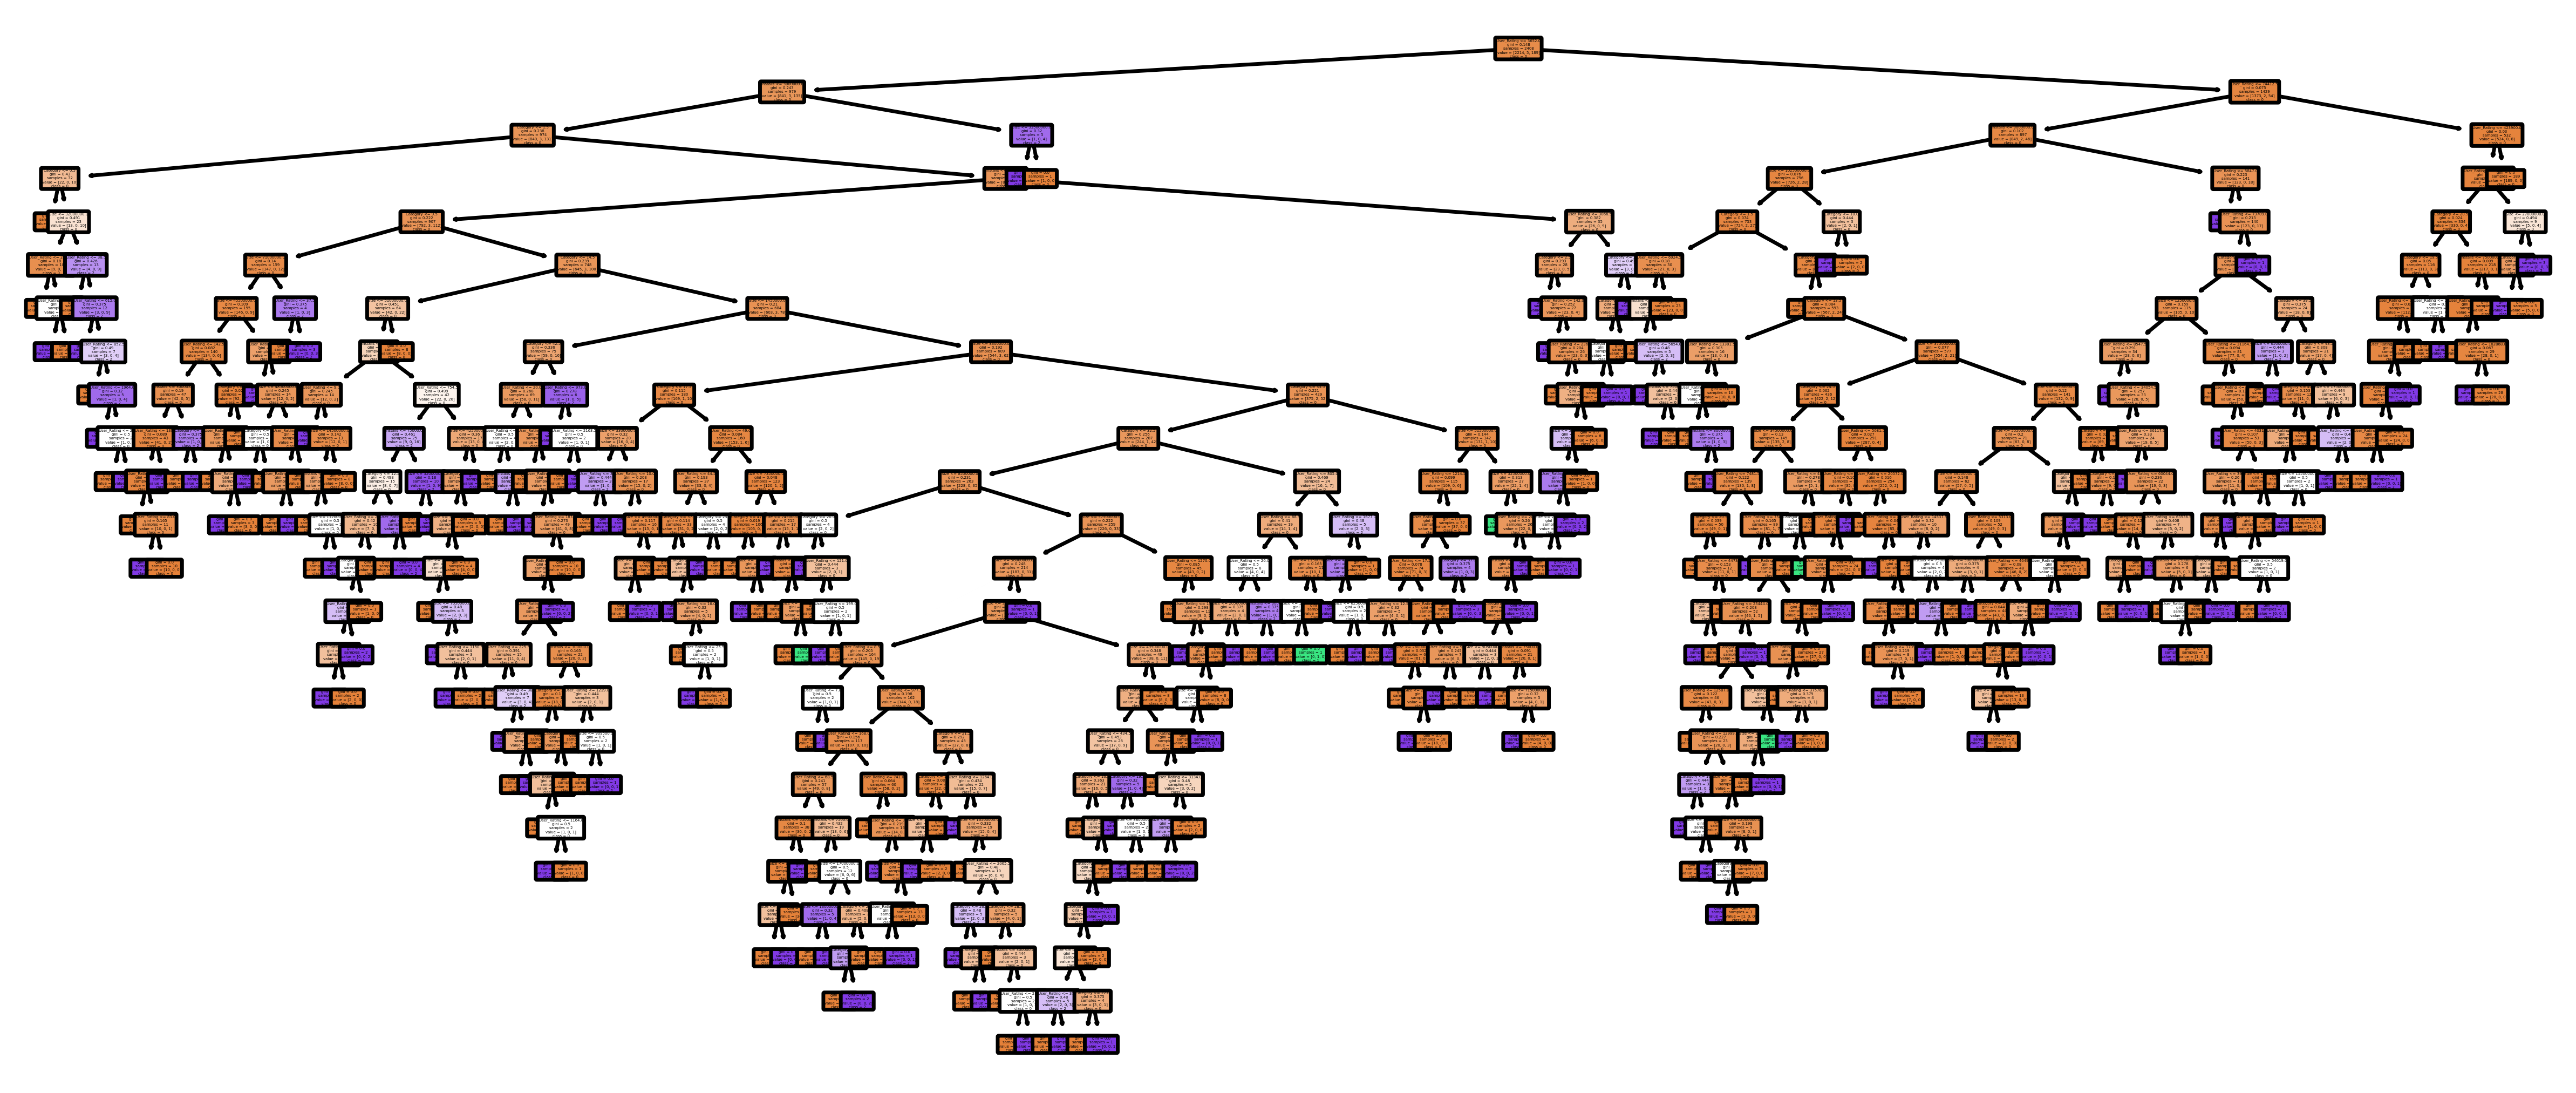

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(dt_clf,
               feature_names=feature_cols,
               class_names=["0", "1", "2"],
               filled=True,
               rounded=True);
plt.savefig('dtree.png')

To examine the decision tree chart, open dtree.png, which was created inside the graphics folder, and enlarge it.

Every internal node in the decision tree chart has a decision rule that divides the data. The node's impurity is measured by the Gini ratio, also known as Gini. When every record in a node—such as the leaf node—belongs to the same class, that node can be considered pure.

The tree that grows out of this isn't pruned. This unpruned tree defies logic and is difficult to comprehend. Let's optimize it through pruning in the following part.

### 8. Optimizing Decision Tree Performance

In [22]:
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dt_clf = dt_clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = dt_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9050387596899225


The classification rate increased to 90%, which is better accuracy than the previous model.

### 9. Optimized Decision Tree Visualization

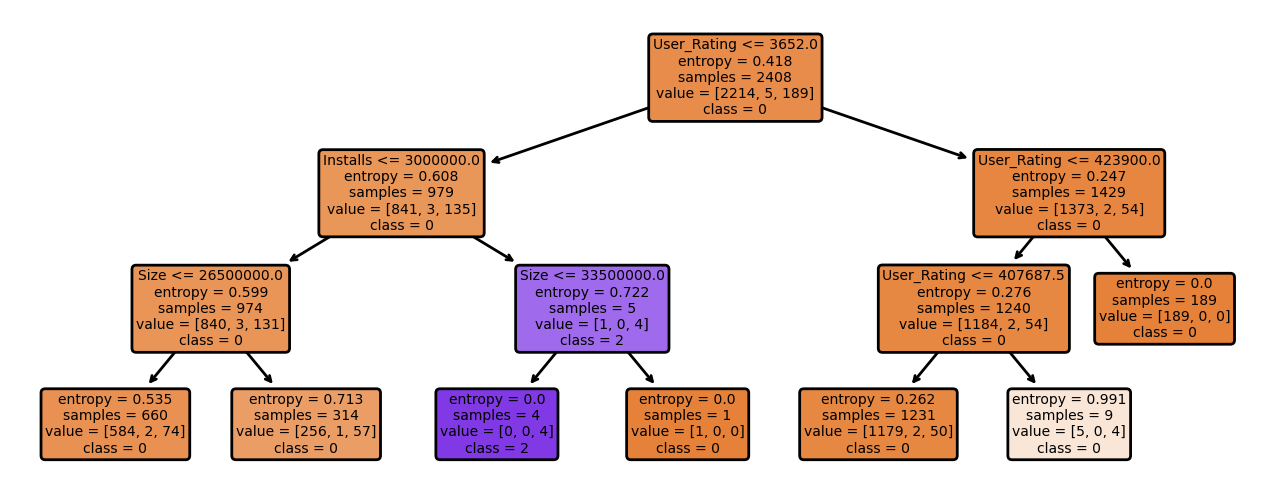

In [23]:
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(dt_clf,
               feature_names=feature_cols,
               class_names=["0", "1", "2"],
               filled=True,
               rounded=True);
plt.savefig('ratings.png')

This graphic shows a decision tree, a structure related to a flowchart that is used for data classification or decision-making. Every leaf node depicts the result, and every internal node reflects a decision rule based on an attribute. The decision tree's details are as follows:

Beginning with a threshold of 3652.0, the root node makes a choice based on the "User_Rating" attribute. It is based on 2408 samples and has an entropy of 0.418. The distribution of the samples across the various classes is shown by the value array [2214, 5, 189], with class 0 constituting the majority.


The root node splits into two branches:
* The left branch breaks further based on "Size <= 26500000.0" and "Installs <= 3000000.0" for "User_Rating <= 3652.0".
* With 660 samples, primarily in class 0, the leftmost leaf under this branch has an entropy of 0.535 ([584, 2, 74]). With 314 samples, largely in class 0, the right leaf under this branch has an entropy of 0.713 ([256, 1, 57]).


* "User_Rating > 3652.0" is the appropriate branch, and it further divides into "User_Rating <= 423900.0" and "User_Rating <= 407687.5".
* Under this branch, the leaf on the left has four samples, all in class 2 ([0, 0, 4]), and an entropy of 0.0.
* With 1231 samples, largely in class 0, the middle leaf has an entropy of 0.262 ([1179, 2, 50]).
* With nine samples spread between classes 0 and 2, the rightmost leaf has an entropy of 0.991 ([5, 0, 4]).

At each node or leaf in the tree, the "value" arrays show how the samples are distributed among the classes at that particular moment. The majority class for that node or leaf is indicated by the "class" label. The node's impurity is gauged by the entropy values, where 0 indicates perfect purity (all samples fall into one class).

By applying the decision rules from the root to the leaves of the decision tree, one can use it to forecast the class of new samples. The approach chosen is determined on the sample's attribute values for classification.